In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
sns.set()

#  Car Price prediction 

### Problem Statement:
The Aim of this project is to build or develop a **Machine Learning model** to predict the price of used car at reasonable rate.In this model we used **Random Forest Regressor** to predict price of used car based on its feaures like manufacturing years, showroom price, kilometer driven, fuel types, number of sellers , transmission types & owners etc. A customer or buyer or seller may know actual market price or values before purchasing or selling of his/her car. In this project we implement and evaluate various learning methods of machine learning on this dataset.

### Dataset Description & data sourse:
- This data we get from www.cardekho.com.
- This dataset is also available on kaggle for free.

### Features Information:
- **Car_Name**: Give the information of car Name.
- **Year**: Give the information about Manufacturing year of car.
- **Selling_Price**:Give the information about selling price.
- **Present_Price**:Give the information about present price in showroom.
- **Kms_Driven**:Give the information about car driven in km.
- **Fuel_Type**:Give the information about which type of fuel is used Petrol ,Diesel or CNG.
- **Seller_Type**: Give the information about seller_type Dealer or Individual.
- **Transmission**:Give the information about Transmission system whether is Manual or Automatic.
- **Owner**:Give the information about Owner 0, 1, 0r 3.

In [2]:
dataset = pd.read_csv('used cars data.csv')

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
dataset.shape

(301, 9)

In [7]:
dataset.duplicated().sum()

2

In [8]:
dataset[dataset.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [9]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
dataset = dataset.drop_duplicates()
dataset.shape

(299, 9)

In [11]:
car_dataset = dataset[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
car_dataset['Current_year'] = 2023

In [13]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [14]:
car_dataset['No_of_year'] = car_dataset['Current_year']- car_dataset['Year']

In [15]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [16]:
car_dataset.drop(['Year'], axis=1, inplace=True)
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [17]:
car_dataset.drop(['Current_year'], axis=1, inplace=True)
car_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [18]:
car_dataset = pd.get_dummies(car_dataset, drop_first=True)
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


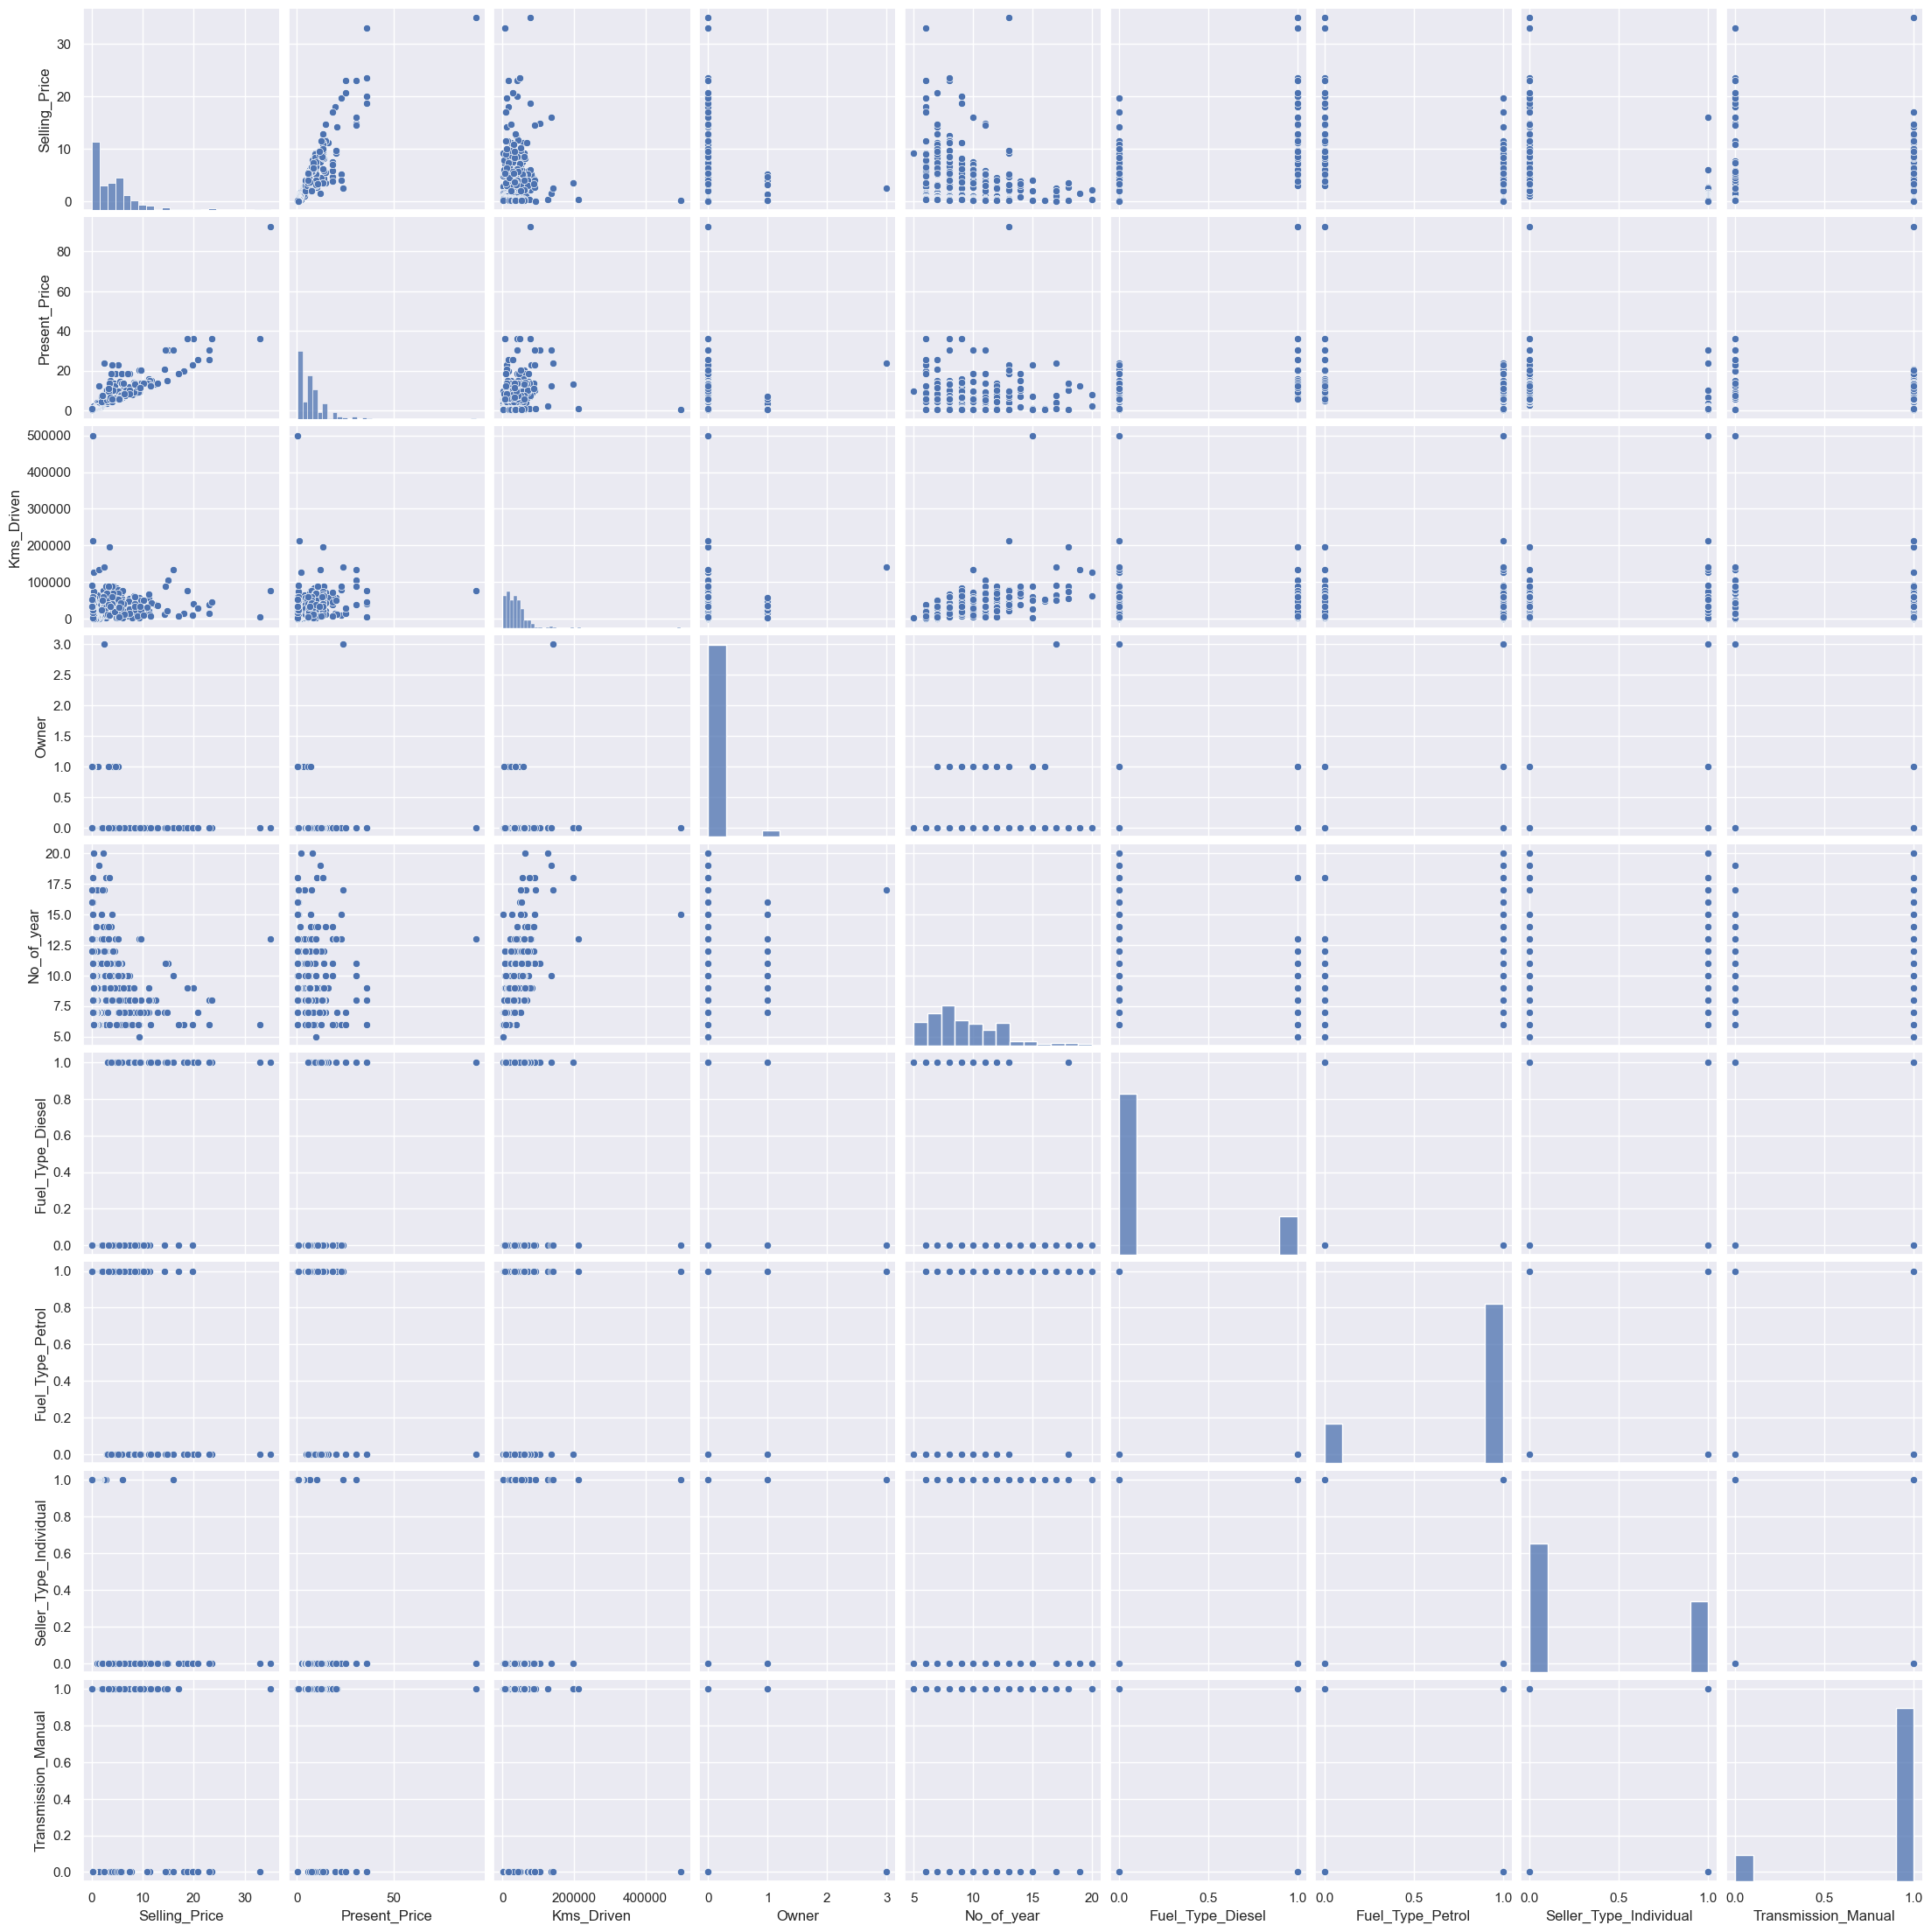

In [19]:
sns.pairplot(car_dataset)

In [20]:
corr = car_dataset.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876378,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876378,1.000000,0.205253,0.009947,0.053563,0.464849,-0.456746,-0.511686,-0.334265
Kms_Driven,0.028566,0.205253,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009947,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
No_of_year,-0.234369,0.053563,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464849,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456746,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Seller_Type_Individual,-0.553851,-0.511686,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334265,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


[]

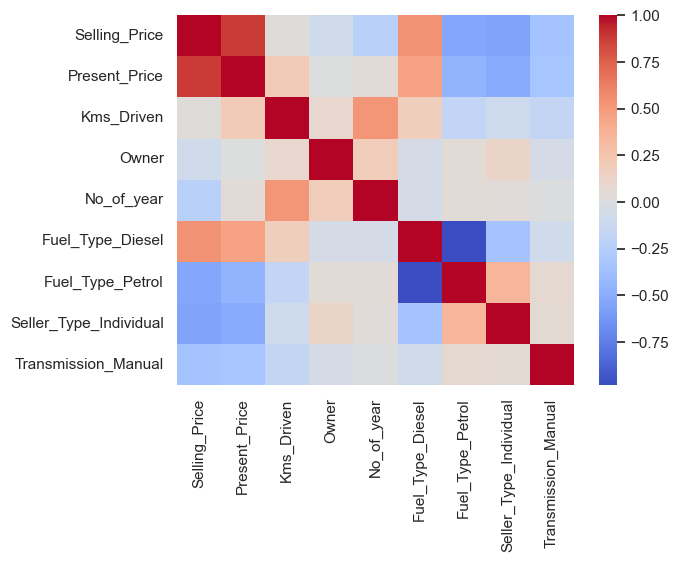

In [21]:
sns.heatmap(corr,cmap='coolwarm')
plt.plot()

<AxesSubplot:>

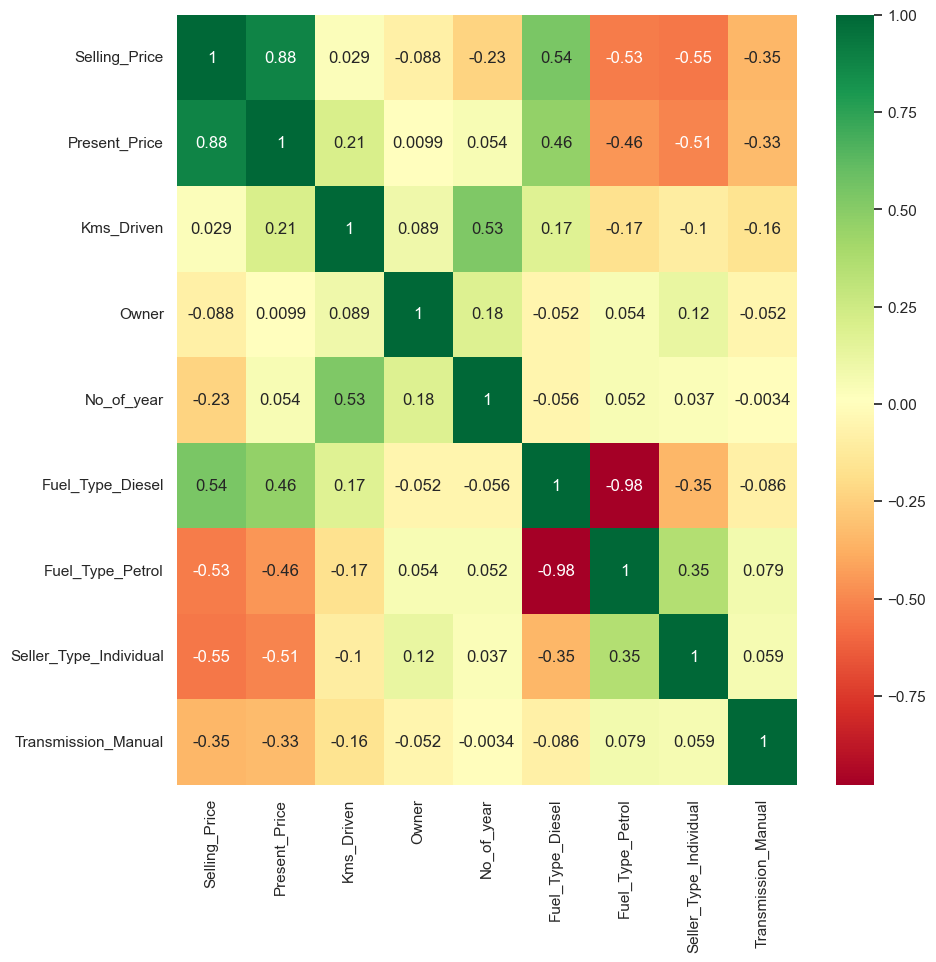

In [22]:
top_corr_features = corr.index
plt.figure(figsize=(10,10))

sns.heatmap(car_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Model Fitting

In [23]:
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [24]:
x = car_dataset.iloc[:,1:]
y = car_dataset.iloc[:,0]

In [25]:
x.head()

,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [26]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [27]:

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[0.42832532 0.0383931  0.00050116 0.08382432 0.08443544 0.0204582
 0.25148558 0.09257686]


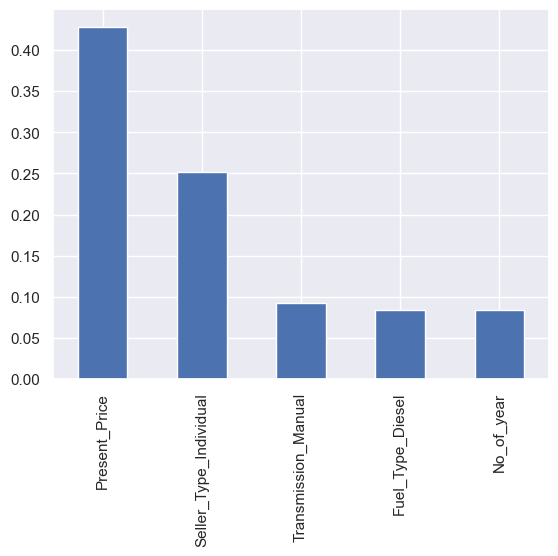

In [29]:
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [31]:
x_train.shape

(239, 8)

In [32]:
y_train.shape

(239,)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor

In [34]:
n_estimators=[int(x) for x in np.linspace(start = 100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
n_estimators =[int(x) for x in np.linspace(start =100, stop=1200,num=12)]
max_features =['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,100]
min_samples_leaf=[1,2,5,10]

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
random_grid = {'n_estimators':n_estimators,
                "max_features":max_features,
                "max_depth":max_depth,
                "min_samples_split":min_samples_split,
                'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
rf = RandomForestRegressor()

In [39]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions =random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [40]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   3.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [42]:
rf_random.best_score_

-5.522722680877882

In [43]:
rf_random.score(x_train,y_train)

-2.547917907578674

In [44]:
prediction = rf_random.predict(x_test)
prediction

array([17.70884755,  4.54185599,  0.41425202,  6.36510792,  7.4453838 ,
       10.38587714,  2.56051882,  0.64559826,  9.75029209,  7.42392113,
        1.25917143,  1.29540653,  0.86859634,  0.76390933,  2.9919373 ,
        0.86725884,  7.71682497,  4.72637008,  5.24958161,  3.21549791,
        3.89751995,  8.36149198,  8.13514619,  6.06409402, 19.50888812,
        0.74935135,  6.94297737,  4.13260259,  4.33616165, 10.30074113,
        5.39394826,  0.8851713 ,  0.95509881,  4.20952234,  4.97705404,
        4.05029926,  0.64097013,  2.59841584,  4.64508905,  7.32355943,
        0.50485153,  8.84957807,  0.55632204,  9.56109458,  4.42037415,
        6.86368586,  0.94273903,  6.88383667,  0.57757106,  8.23872811,
        4.66718554,  4.05447001,  4.5872104 ,  4.89330161,  5.18138667,
        0.5564092 ,  0.53211779,  4.28739103,  7.64808815,  6.36780935])

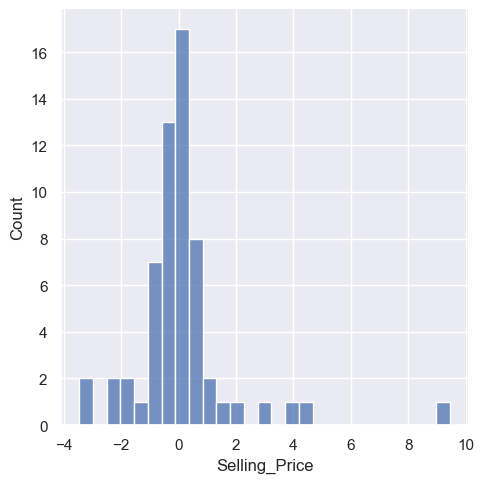

In [45]:
sns.displot(y_test-prediction)

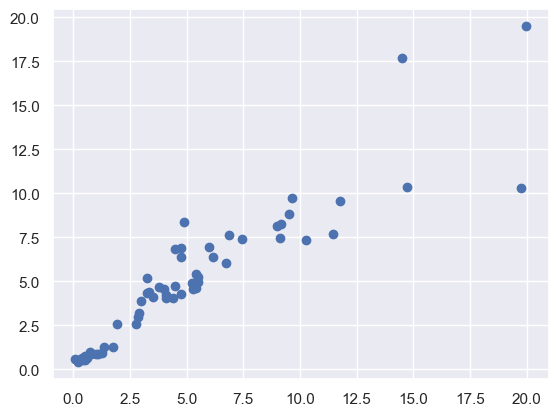

In [46]:
plt.scatter(y_test,prediction)

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
mse

3.155188036602634

In [48]:
np.sqrt(mse)

1.7762848973637744